# ABALONE CASE STUDY 

Name: vaibhav Tayade
    
Contact details: 8087970061
    
Email id: vaibhav_t29@rediffmail.com

# Importing Relevant Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Importing Dataset

In [2]:
ds = pd.read_csv('abalone_data.csv')
ds

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


NOTE:

Number of rings is our target variable here.
so Number of rings is a continous data column, we know it's a Linear Regression Problem.

In [3]:
#checking presence of null values:

ds.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Observations:

There are no Null Values in the dataset.

In [5]:
#checking details of dataset:

ds.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observation: 

Our dataset is having same Mean and Median values, which indicates there is prsence of no much outliers and skewness in the dataset. But we need to do analysis to confirm that.


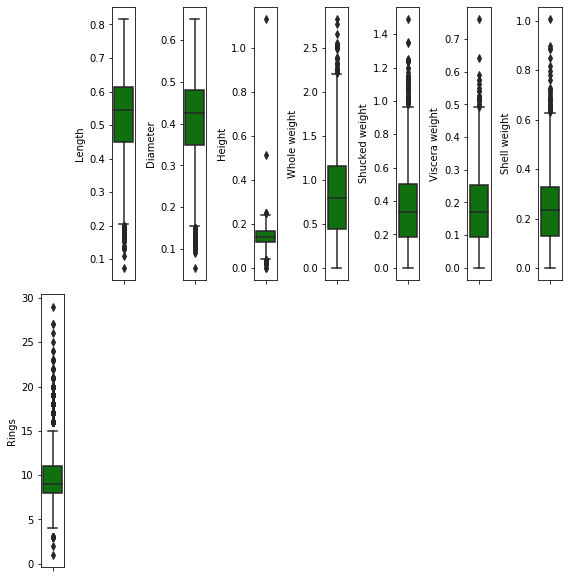

In [6]:
#checking presence of outliers with the help of boxplot:

column_list = ds.columns.values
ncol=8
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(column_list)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(ds[column_list[i]],color='green',orient='v')
    plt.tight_layout()

Observations:

    There are presence of outliers in almost all columns. we can confirm that by above box plot.

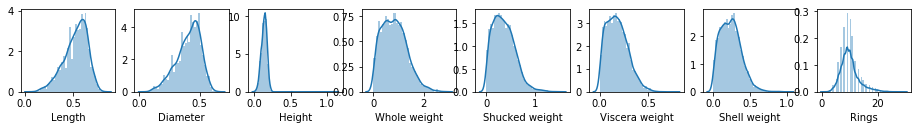

In [7]:
# checking skewness with the help of distplot

collist = ds.columns.values
ncol = 9
nrows = 10


plt.figure(figsize=(18, 18))

for i in range(1, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.distplot(ds[collist[i]])

Observations:

We can see skewness in the above distplots

# BIVARIATE ANALYSIS

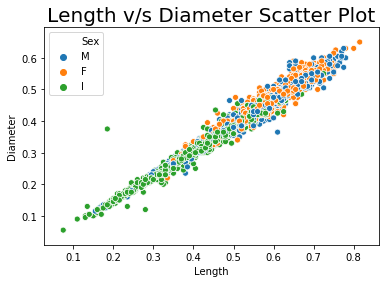

In [8]:
plt.title('Length v/s Diameter Scatter Plot', fontsize = 20)

sns.scatterplot(ds['Length'], ds['Diameter'], hue=ds['Sex'])

Observations:
    
1) We can see that Male species are the ones having large length and diameter.
2) Female species has moderate to large length and diameter values.
3) whereas Infant species has less length and diameter values

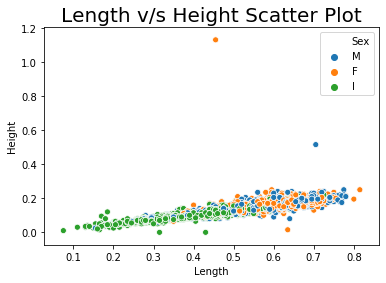

In [9]:
plt.title('Length v/s Height Scatter Plot', fontsize = 20)

sns.scatterplot(ds['Length'], ds['Height'], hue=ds['Sex'])


Observations:
    
1) From the above observations we can say that, height doesn't increase with change in gender among the abalone.
2) Length increases from change in gender, i.e. infants have less lenght and height both, Females and Males have moderate to high length, but not much increase in there height.

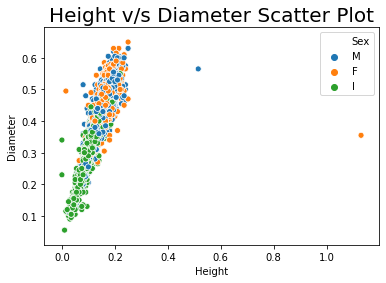

In [10]:

plt.title('Height v/s Diameter Scatter Plot', fontsize = 20)
sns.scatterplot(ds['Height'], ds['Diameter'], hue=ds['Sex'])

Observations:

1) From the above scatter plot, we can say that, Male and Female species have moderate to high diameter, but not much change in their heights.


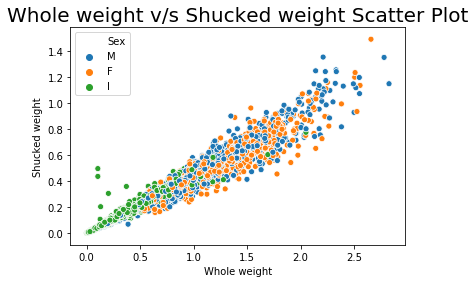

In [11]:
plt.title('Whole weight v/s Shucked weight Scatter Plot', fontsize = 20)

sns.scatterplot(ds['Whole weight'], ds['Shucked weight'], hue=ds['Sex'])

Observations:

    
There is a linear relation between Shucked weight and Whole weight.

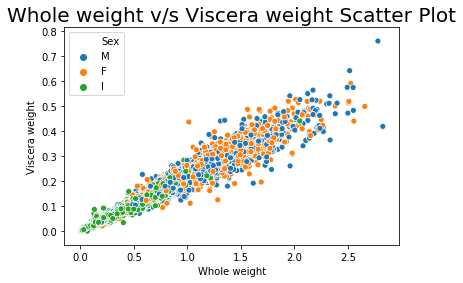

In [12]:
plt.title('Whole weight v/s Viscera weight Scatter Plot', fontsize = 20)


sns.scatterplot(ds['Whole weight'], ds['Viscera weight'], hue=ds['Sex'])

Observation:
    
There is a Linear relation between Whole weight and Viscera weight

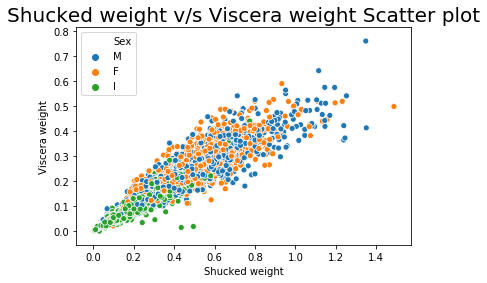

In [13]:
plt.title('Shucked weight v/s Viscera weight Scatter plot', fontsize = 20)
sns.scatterplot(ds['Shucked weight'], ds['Viscera weight'], hue=ds['Sex'])

Observation:
    
Infants has very less Shucked weight and Viscera weight.
Male and Female species has less to high values of both shucked weight and viscera weight.

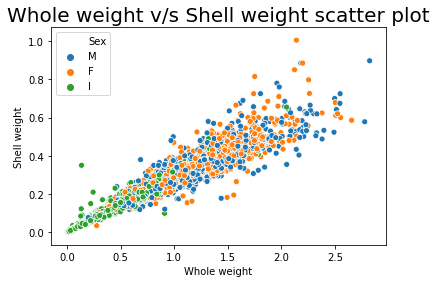

In [14]:
plt.title('Whole weight v/s Shell weight scatter plot', fontsize = 20)

sns.scatterplot(ds['Whole weight'], ds['Shell weight'], hue=ds['Sex'])

Observation:
Whole weight and Shell Weight has linear relation with each other.

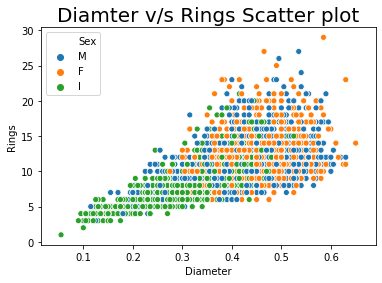

In [15]:
plt.title('Diamter v/s Rings Scatter plot', fontsize = 20)

sns.scatterplot(ds['Diameter'], ds['Rings'], hue=ds['Sex'])

Observations:
With increase in Diameter, Rings size also increases with all the species.

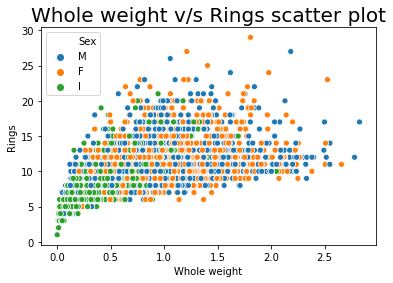

In [16]:
plt.title('Whole weight v/s Rings scatter plot', fontsize = 20)

sns.scatterplot(ds['Whole weight'], ds['Rings'], hue=ds['Sex'])

Observations:
With increase in Whole weight, ring size also increases.

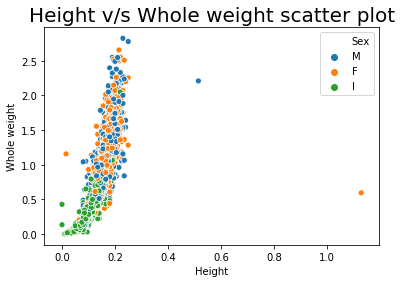

In [17]:
plt.title('Height v/s Whole weight scatter plot', fontsize = 20)

sns.scatterplot(ds['Height'], ds['Whole weight'], hue=ds['Sex'])

Observations:
    
From the above scatter plot, we can say that height of the all abalone genders, doesn't increase with respect to Whole weight

# CORRELATION ANALAYSIS

In [18]:
dscor = ds.corr()
dscor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


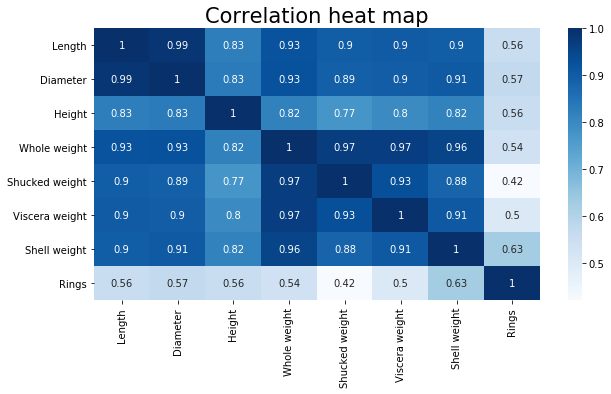

In [19]:
plt.figure(figsize=(10,5))
plt.title('Correlation heat map', fontsize = 21)

sns.heatmap(dscor,cmap='Blues', annot=True)

Observations:

1) Shell weight has heighest corelation with the rings size i.e. of 0.63.
2) Length and Height has corelation of 0.56 with the rings.
3) Shucked weight has corelation of 0.42 with the rings.
4) Viscera weight has corelation of 0.5 with the rings.
5) Whole weight has corelation of 0.54 with the rings.
6) Diameter has corelation of 0.57 with the rings.

In [20]:
ds.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# ENCODING THE SEX COLUMN

In [21]:
# As Sex column has categorical data in it, we need to encode it.
#Label encoding the sex column:
LE = LabelEncoder()
ds['Sex'] = LE.fit_transform(ds['Sex'])

In [22]:
ds['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [23]:
#Removing Outliers:

from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [24]:
threshold = 3
print(np.where(z>threshold))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [25]:
#creating new dataset without outliers and skewness
ds_new = ds[(z<3).all(axis=1)]
ds_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [26]:
ds_new.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

OBSERVATION:
    
We can observe here that skewness is removed very efficiently.


In [27]:
print(((ds.shape[0]-ds_new.shape[0])/ds.shape[0]*100))

3.5910940866650707


Observation:
    
After removing the outliers using z-score method, we can notice that, we have lost almost 3.5% of data which is acceptable.

In [28]:
ds_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
x = ds_new.iloc[:,0:8]
y = ds_new.iloc[:,-1]

In [30]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [31]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

In [33]:
ds.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [36]:
sc = StandardScaler()
x= sc.fit_transform(x)
columnslist = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
x= pd.DataFrame(x, columns = columnslist)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.159698,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659
1,1.159698,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033
2,-1.285382,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629
3,1.159698,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574
4,-0.062842,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290
...,...,...,...,...,...,...,...,...
4022,-1.285382,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240
4023,1.159698,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138
4024,1.159698,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453
4025,-1.285382,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647


In [37]:
x['Sex'] = ds['Sex']

In [38]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659
1,2,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033
2,0,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629
3,2,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574
4,1,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290
...,...,...,...,...,...,...,...,...
4022,2,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240
4023,1,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138
4024,1,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453
4025,1,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647


In [48]:
x['Sex'].value_counts()

2    1472
1    1287
0    1268
Name: Sex, dtype: int64

# TRAIN TEST SPLIT

In [49]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.22, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3141, 8)
(3141,)
(886, 8)
(886,)


# LINEAR REGRESSION MODEL

In [40]:
#Now we need to import few more libraries:

from sklearn.linear_model import LinearRegression


In [50]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [42]:
lm.coef_

array([-0.02754841,  0.05836682,  0.85662324,  0.79779407,  3.19066175,
       -3.66677554, -0.65082308,  1.01816577])

In [43]:
lm.intercept_

9.753365173747165

In [51]:
lm.score(x_train, y_train)

0.5184189360786862

# ACCURACY

SCORE:
    
Our Model is having Accuracy of 51.84% 

In [53]:
predicted_x_values = lm.predict(x_test)
print('Predicted values: ', predicted_x_values)

Predicted values:  [ 8.6286552  10.07803572 11.56815383 13.71245276  5.69609447  8.36837613
  9.4982836  11.82515693  9.93621432  7.58625868  9.13792746 10.29765159
  7.98629444 10.81852083  8.48821123  6.81231385  9.69781592 10.89756218
 10.58872372  8.1988729   7.22612556 11.72173781 11.13201367  9.71729736
 11.58098944  7.77627438 10.64902015  9.80991691  7.60720052  8.3101687
  7.1441642  10.77500478 10.87383682  9.07139365 10.7232754   7.48985977
  9.72717826  6.86030412  8.22697288 11.45857348 10.32436118 10.76563426
 15.25415501 10.23739388 10.4212775  14.28699593  8.4751813  11.88381324
 16.06795134  9.65577524  9.23116617  9.21143701 11.38413925  8.19625857
  7.54401186  8.19654565  9.11915785 11.33385298 10.87938998  8.20050685
 10.48411781  9.23548407  5.73478964  9.58867171  4.99580383  7.67750346
 12.19655153  9.7512017   5.8092427   7.89900879 12.0399206  16.11205405
  8.86313779 10.38520473  9.59377416  7.24495253  8.75936262  9.54498049
  8.32544028  6.18763671  8.69205

# Check Over fitting with the help of Cross Validation Score

In [58]:
print(cross_val_score(lm, x, y, cv=5).mean())

0.41424018394371276


# Checking score metrics:

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# calculating errors::


print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, predicted_x_values))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, predicted_x_values))

print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, predicted_x_values)))



ERRORS:
MEAN ABSOLUTE ERROR:  1.4907052666394807
MEAN SQUARED ERROR:  4.149638376033266
ROOT MEAN SQUARED ERROR:  2.037066119700896


# OBERVATION:
    
    Our model is having accuracy of 51.84 % which is better but not good.
    

In [55]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predicted_x_values))

0.4924234709777642


R2 Score:
    
    R2 Score of our model is 0.49

# SAVING MODEL

In [59]:
import joblib
joblib.dump(lm, 'Vaibhav_Abalone_Model.pkl')

['Vaibhav_Abalone_Model.pkl']

# Reloading Model

In [60]:
#Reloading the model and predicting the dataset.
Abalone_model = joblib.load('Vaibhav_Abalone_Model.pkl')
Abalone_model.predict(x_train)

array([10.22153554, 10.98506998,  9.76077627, ...,  7.51346608,
        9.05129975,  8.46205902])

# THANK YOU